In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings


In [7]:
# SETUP

image = cv2.imread('test_1.bmp')


test = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# LOCALIZATION

test = cv2.GaussianBlur(test,(15,15), 0)
edges = cv2.Canny(test,50,100)
pupil = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,2, minDist = 70,
                            param2=50,minRadius=20,maxRadius=75)

print(pupil)
pupil = np.uint16(np.around(pupil))
for value in pupil[0,:]:
    center_x = value[0]
    center_y = value[1]
    radius = value[2]
pupil = np.array([center_x, center_y, radius])

base = np.zeros_like(test)
mask_pupil = cv2.circle(base, (pupil[0], pupil[1]), pupil[2], (255,255,255), -1)
mask_pupil = cv2.bitwise_not(mask_pupil)
result = cv2.bitwise_and(test, mask_pupil)
mask_background = cv2.circle(base, (pupil[0], pupil[1]), pupil[2]*3, (255,255,255), -1)
result = cv2.bitwise_and(result, mask_background)

test = cv2.equalizeHist(result)
test = cv2.GaussianBlur(test,(15,15),0)


edges = cv2.Canny(test, 50, 60)
iris = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,2,minDist = 1000,
                            param2=10,minRadius=pupil[2]+20,maxRadius=((pupil[2]*3)-10))

iris = np.uint16(np.around(iris))
for value in iris[0,:]:
    iris_x = value[0]
    iris_y = value[1]
    radius = value[2]
iris = np.array([center_x, center_y, radius])


# cv2.circle(image,(iris[0],iris[1]),iris[2],color = (0,255, 0), thickness = 2)
# cv2.circle(image,(pupil[0],pupil[1]),pupil[2],color = (0,255, 0), thickness = 2)

base = np.zeros_like(image)
mask_pupil = cv2.circle(base, (pupil[0], pupil[1]), pupil[2], (255,255,255), -1)
mask_pupil = cv2.bitwise_not(mask_pupil)
result = cv2.bitwise_and(image, mask_pupil)
mask_iris = cv2.circle(base, (iris[0], iris[1]), iris[2], (255,255,255), -1)
result = cv2.bitwise_and(result, mask_iris)
print(result.shape)

# Added code - this just reframes the image to center around iris to prevent wavy normalized iris

# same as iris_x and iris_y
x = int(iris[0])
y = int(iris[1])

w = int(iris[2])
h = int(iris[2])
print(x,y,w,h)


# when x + w > 320 which is the size of the image, there is an error
# if result.shape[1] > 319:
#     final = result[(y - h) : (y + h) - 2, (x - w) : (x + w)]
# else:
#     final = result[(y - h) : (y + h), (x - w) : (x + w)]
    
# final = result[(y - h) : (y + h), (x - w) : (x + w)]

# result2 = cv2.resize(result, (result.shape[1]*2, result.shape[0]*2))
# print(result2.shape)

final = result[iris[1] - iris[2] : iris[1] + iris[2], iris[0] - iris[2] : iris[0] + iris[2]]
print(final.shape)

# final = cv2.resize(final, (final.shape[1]*2, final.shape[0]*2))

# if final.shape[0] != final.shape[1]:
    
#     print(final.shape)

# final2 = cv2.resize(final, (final.shape[1]*2, final.shape[0]*2))

# print(final2.shape)

# cv2.imshow('detected circles',result)
# cv2.waitKey(0)

# TODO: fix incapable shape sizes
# image is wavy when final.shape 0 and 1 are not equal 


[[[181.  135.   37.8]]]
(280, 320, 3)
181 135 103 103
(206, 206, 3)


In [8]:
# NORMALIZATION
# adapted from https://github.com/prafulsurve/IrisDetection

# 38 to 102

# set everything fomr 0 to 65


# theta = np.arange(0.00, np.pi * 2, 0.01) #array of columns in final image (goes to 6.28 because period is 2 pi)
# r = np.arange(pupil[2], iris[2], 1)

# print(r.size)
# cartesian_img = np.empty(shape = [r.size + 1, iris[2] - pupil[2], 3]) # empty array of dimensions of final image

# m = interp1d([np.pi * 2, 0],[0, final.shape[1]]) #interpolate location on x axis
#     # interpolation between x = values from 0 and 6.28 and y = 0 to width of final image

# # calculate all pixel values for normalized cartesian image 
# for i in r:
#     i += pupil[2]

#     for j in theta:
#         # x = rcos(theta)
#         polarX = int((i * np.cos(j)) + final.shape[1] / 2)
#         # y = rsin(theta)
#         polarY = int((i * np.sin(j)) + final.shape[0] / 2)
        
#         cartesian_img[i][int(m(j) - 1)] = final[polarY][polarX]


# cartesian_img = cartesian_img.astype('uint8')
# img = np.asarray(cartesian_img)
# plt.imshow(img)

In [9]:

# theta = np.arange(0.00, np.pi * 2, 0.01) #array of columns in final image (goes to 6.28 because period is 2 pi)
# r = np.arange(0, int(final.shape[0] / 2), 1) #array of rows in final image

# cartesian_img = np.empty(shape = [r.size, int(final.shape[1]), 3]) # empty array of dimensions of final image

# m = interp1d([np.pi * 2, 0],[0, final.shape[1]]) #interpolate location on x axis
#     # interpolation between x = values from 0 and 6.28 and y = 0 to width of final image

# # calculate all pixel values for normalized cartesian image 
# for i in r:
#     for j in theta:
#         # x = rcos(theta)
#         polarX = int((i * np.cos(j)) + final.shape[1] / 2)
#         # y = rsin(theta)
#         polarY = int((i * np.sin(j)) + final.shape[0] / 2)
        
#         cartesian_img[i][int(m(j) - 1)] = final[polarY][polarX]

# cartesian_img = cartesian_img[:][pupil[2] + 1:] #patch
# cartesian_img = cartesian_img.astype('uint8')
# img = np.asarray(cartesian_img)
# plt.imshow(img)

# add threshold mask from week6 slides
# remove noise (turn black), bitwise_not

In [10]:
# ENHANCEMENT 

# test = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# test = cv2.equalizeHist(test)
# enhanced = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
# plt.imshow(enhanced)


(103, 206, 3)


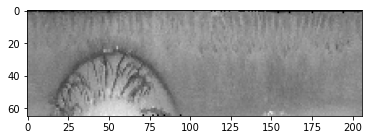

In [12]:
# iris_width = iris[2] - pupil[2]
# iris_diameter = iris[2]*2

# theta = np.arange(0.00, np.pi * 2, 0.01) #array of columns in final image (goes to 6.28 because period is 2 pi)
# r = np.arange(0, iris[2]- pupil[2], 1) #array of rows in final image
# final = result[iris[1] - iris[2] : iris[1] + iris[2], iris[0] - iris[2] : iris[0] + iris[2]]


# # q = np.arange(0.00, np.pi*2, 0.01) #theta
# # inn = np.arange(0, int(iris_image_to_show.shape[0]/2), 1) #radius

# # cartisian_image = np.empty(shape = [inn.size, int(iris_image_to_show.shape[1]), 3])
# # m = interp1d([np.pi*2, 0],[0,iris_image_to_show.shape[1]])

# # cv2.imshow('detected circles',final)
# # cv2.waitKey(0)
# print(final.shape)
# print(iris[2]*2)
# cartesian_img = np.empty(shape = [iris_width, iris_diameter, 3]) # empty array of dimensions of final image
# print(cartesian_img.shape)
# # plt.imshow(cartesian_img)
# # plt.show()
# m = interp1d([np.pi * 2, 0],[0, iris_diameter]) #interpolate location on x axis
#     # interpolation between x = values from 0 and 6.28 and y = 0 to width of final image

# # calculate all pixel values for normalized cartesian image
# for i in r:
#     i = z + pupil[2]
#     for j in theta:
#         # x = rcos(theta)
#         polarX = int((i * np.cos(j)) + iris_diameter / 2)
#         # y = rsin(theta)
#         polarY = int((i * np.sin(j)) + iris_diameter / 2)
#         cartesian_img[z][int(m(j) - 1)] = final[polarY][polarX]


# # cartesian_img = cartesian_img[:][pupil[2]:iris[2]] #patch
# cartesian_img = cartesian_img.astype('uint8')
# img = np.asarray(cartesian_img)
# # cv2.imshow('detected circles', img)
# # # cv2.waitKey(0)
# plt.imshow(cartesian_img)




theta = np.arange(0.00, np.pi * 2, 0.01) #array of columns in final image (goes to 6.28 because period is 2 pi)
r = np.arange(0, int(final.shape[0]/2), 1)

# print(r.size)
cartesian_img = np.empty(shape = [r.size, int(final.shape[1]), 3]) # empty array of dimensions of final image
print(cartesian_img.shape)
m = interp1d([np.pi * 2, 0],[0, int(final.shape[1])]) #interpolate location on x axis
    # interpolation between x = values from 0 and 6.28 and y = 0 to width of final image

# calculate all pixel values for normalized cartesian image 
for i in r:
    # i += pupil[2]
    for j in theta:
        # x = rcos(theta)
        polarX = int((i * np.cos(j)) + final.shape[1] / 2)
        # y = rsin(theta)
        polarY = int((i * np.sin(j)) + final.shape[0] / 2)
        
        cartesian_img[i][int(m(j) - 1)] = final[polarY][polarX]

cartesian_img = cartesian_img[:][pupil[2]:iris[2]] #patch
cartesian_img = cartesian_img.astype('uint8')
img = np.asarray(cartesian_img)
plt.imshow(img)

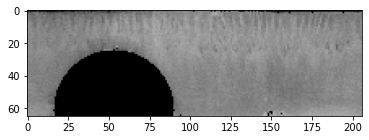

In [13]:
# thresholding and removing eyelid

# ret, reflections = cv2.threshold(cartesian_img,200,255,cv2.THRESH_BINARY)
# plt.imshow(reflections)

ret, eyelid = cv2.threshold(cartesian_img,90,255,cv2.THRESH_BINARY)
# plt.imshow(eyelid)
eyelid = cv2.GaussianBlur(eyelid,(15,15),0)
eyelid = cv2.Canny(eyelid,50,100)
plt.imshow(eyelid)


eyelid_circ = cv2.HoughCircles(eyelid,cv2.HOUGH_GRADIENT,2,minDist = 500,
                            param2=10,minRadius=0,maxRadius=100)

eyelid_circ = np.uint16(np.around(eyelid_circ))
for value in eyelid_circ[0,:]:
    
    eyelid_circ_x = value[0]
    eyelid_circ_y = value[1]
    eyelid_circ_radius = value[2]
    
# wtf = np.array([center_x, center_y, radius])
# eyelid_circ
f
base = np.zeros_like(cartesian_img)
mask_eyelid = cv2.circle(base, (eyelid_circ_x,eyelid_circ_y), eyelid_circ_radius, color = (0,0,0), thickness = 2)
res2 = cv2.bitwise_not(mask_eyelid)
# plt.imshow(res2)

mask_eyelid = cv2.bitwise_or(cartesian_img, mask_eyelid)
result = cv2.bitwise_and(cartesian_img, mask_eyelid)
mask_background = cv2.circle(base, (eyelid_circ_x,eyelid_circ_y), eyelid_circ_radius, (255,255,255), -1)
result = cv2.bitwise_or(result, mask_background)
# plt.imshow(result)

ret, more_mask = cv2.threshold(result,190,255,cv2.THRESH_BINARY)
# plt.imshow(more_mask)

xd = cv2.bitwise_not(more_mask)
xd = cv2.bitwise_and(cartesian_img, xd)
plt.imshow(xd)


# mask_eyelid = cv2.bitwise_not(mask_eyelid)
# plt.imshow(mask_eyelid)
# wtf = cv2.bitwise_and(cartesian_img, mask_eyelid)



# cv2.circle(image,(iris[0],iris[1]),iris[2],color = (0,255, 0), thickness = 2)
# cv2.circle(image,(pupil[0],pupil[1]),pupil[2],color = (0,255, 0), thickness = 2)

# base = np.zeros_like(image)
# mask_pupil = cv2.circle(base, (pupil[0], pupil[1]), pupil[2], (255,255,255), -1)
# mask_pupil = cv2.bitwise_not(mask_pupil)
# result = cv2.bitwise_and(image, mask_pupil)
# mask_iris = cv2.circle(base, (eyelid_circ[0], eyelid_circ[1]), eyelid_circ[2], (255,255,255), -1)
# result = cv2.bitwise_and(result, mask_iris)
# print(result.shape)



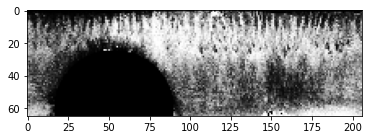

In [14]:
test = cv2.cvtColor(xd, cv2.COLOR_BGR2GRAY)
test = cv2.equalizeHist(test)
enhanced = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(enhanced)
# plt.show()

# cv2.imshow('detected circles', test)
# cv2.waitKey(0)

(9, 9)


(48, 512, 3)

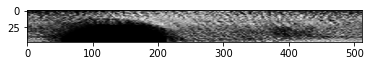

In [15]:
# Feature Extraction

filter_size = 9
height = np.fix(filter_size / 2)
width = np.fix(filter_size / 2)
deltaX = 4.5
deltaY = 1.5
f = 1 / deltaY
gabor_filter = np.empty((filter_size, filter_size))

# constructing the kernel
for i in range(int(-height), int(height) + 1, 1):
    for j in range(int(-width), int(width) + 1, 1):
        # normalizing_factor = (1 / (2 * np.pi * deltaX * deltaY))
        g = (np.exp((-0.5) * ((i**2 / deltaX**2) + (j**2 / deltaY**2)))) # Gabor function
        m1 = np.cos(2 * np.pi * f * (np.sqrt((i**2) + (j**2)))) #modulating function for two channels
        gabor_filter[i,j] = g * m1
        
plt.imshow(gabor_filter)
print(gabor_filter.shape)

# applying the kernel
filtered_img = cv2.filter2D(enhanced, cv2.CV_8UC3, gabor_filter)
# plt.imshow(filtered_img)

# standardizing image shape for classifier input
standard_size_img = cv2.resize(filtered_img, (512, 48))
plt.imshow(standard_size_img)
standard_size_img.shape


In [74]:
from scipy.ndimage.filters import generic_filter

gray_img = cv2.cvtColor(standard_size_img, cv2.COLOR_BGR2GRAY)

vec = []
block_size = 8
kernel = [[1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,1]]
means = generic_filter(gray_img, np.mean, footprint = kernel)
sds = generic_filter(gray_img, np.std, footprint = kernel)
# print(sds.shape)
# print(means)
# plt.imshow(means)
# print(type(means))
# print(len(sds))
img_mean_std = []

for i in range(0, gray_img.shape[0], block_size):
    for j in range(0, gray_img.shape[1], block_size):
        img_mean_std.append(means[i,j])
        img_mean_std.append(sds[i,j])

vec = np.asarray(img_mean_std)
print(vec[0])


19


(280, 320, 3)
177 143 114 114
(228, 228, 3)
(228, 228, 3)
228
(70, 228, 3)


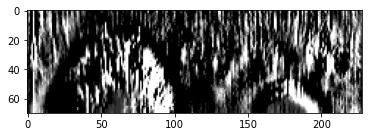

In [142]:
#whole script
image = cv2.imread('003_1_3.bmp')


test = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# LOCALIZATION

test = cv2.GaussianBlur(test,(15,15), 0)
edges = cv2.Canny(test,50,100)
pupil = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,2, minDist = 70,
                            param2=50,minRadius=20,maxRadius=60)


pupil = np.uint16(np.around(pupil))
for value in pupil[0,:]:
    center_x = value[0]
    center_y = value[1]
    radius = value[2]
pupil = np.array([center_x, center_y, radius])

base = np.zeros_like(test)
mask_pupil = cv2.circle(base, (pupil[0], pupil[1]), pupil[2], (255,255,255), -1)
mask_pupil = cv2.bitwise_not(mask_pupil)
result = cv2.bitwise_and(test, mask_pupil)
mask_background = cv2.circle(base, (pupil[0], pupil[1]), pupil[2]*3, (255,255,255), -1)
result = cv2.bitwise_and(result, mask_background)

test = cv2.equalizeHist(result)
test = cv2.GaussianBlur(test,(15,15),0)


edges = cv2.Canny(test, 50, 60)
iris = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,2,minDist = 1000,
                            param2=10,minRadius=pupil[2]+20,maxRadius=((pupil[2]*3)-10))

iris = np.uint16(np.around(iris))
for value in iris[0,:]:
    iris_x = value[0]
    iris_y = value[1]
    radius = value[2]
iris = np.array([center_x, center_y, radius])


# cv2.circle(image,(iris[0],iris[1]),iris[2],color = (0,255, 0), thickness = 2)
# cv2.circle(image,(pupil[0],pupil[1]),pupil[2],color = (0,255, 0), thickness = 2)

base = np.zeros_like(image)
mask_pupil = cv2.circle(base, (pupil[0], pupil[1]), pupil[2], (255,255,255), -1)
mask_pupil = cv2.bitwise_not(mask_pupil)
result = cv2.bitwise_and(image, mask_pupil)
mask_iris = cv2.circle(base, (iris[0], iris[1]), iris[2], (255,255,255), -1)
result = cv2.bitwise_and(result, mask_iris)
print(result.shape)

# Added code - this just reframes the image to center around iris to prevent wavy normalized iris

# same as iris_x and iris_y
x = int(iris[0])
y = int(iris[1])

w = int(iris[2])
h = int(iris[2])
print(x,y,w,h)


# when x + w > 320 which is the size of the image, there is an error
# if result.shape[1] > 319:
#     final = result[(y - h) : (y + h) - 2, (x - w) : (x + w)]
# else:
#     final = result[(y - h) : (y + h), (x - w) : (x + w)]
    
# final = result[(y - h) : (y + h), (x - w) : (x + w)]

# result2 = cv2.resize(result, (result.shape[1]*2, result.shape[0]*2))
# print(result2.shape)

final = result[iris[1] - iris[2] : iris[1] + iris[2], iris[0] - iris[2] : iris[0] + iris[2]]
print(final.shape)

# final = cv2.resize(final, (final.shape[1]*2, final.shape[0]*2))

# if final.shape[0] != final.shape[1]:
    
#     print(final.shape)

# final2 = cv2.resize(final, (final.shape[1]*2, final.shape[0]*2))

# print(final2.shape)

# cv2.imshow('detected circles',result)
# cv2.waitKey(0)

# TODO: fix incapable shape sizes
# image is wavy when final.shape 0 and 1 are not equal 


iris_width = iris[2] - pupil[2]
iris_diameter = iris[2]*2

theta = np.arange(0.00, np.pi * 2, 0.01) #array of columns in final image (goes to 6.28 because period is 2 pi)
r = np.arange(0, iris[2]- pupil[2], 1) #array of rows in final image
final = result[iris[1] - iris[2] : iris[1] + iris[2], iris[0] - iris[2] : iris[0] + iris[2]]
# cv2.imshow('detected circles',final)
# cv2.waitKey(0)
print(final.shape)
print(iris[2]*2)
cartesian_img = np.empty(shape = [iris_width, iris_diameter, 3]) # empty array of dimensions of final image
print(cartesian_img.shape)
# plt.imshow(cartesian_img)
# plt.show()
m = interp1d([np.pi * 2, 0],[0, iris_diameter]) #interpolate location on x axis
    # interpolation between x = values from 0 and 6.28 and y = 0 to width of final image

# calculate all pixel values for normalized cartesian image
for z in r:
    i = z + pupil[2]
    for j in theta:
        # x = rcos(theta)
        polarX = int((i * np.cos(j)) + iris_diameter / 2)
        # y = rsin(theta)
        polarY = int((i * np.sin(j)) + iris_diameter / 2)
        cartesian_img[z][int(m(j) - 1)] = final[polarY][polarX]


# cartesian_img = cartesian_img[:][pupil[2]:iris[2]] #patch
cartesian_img = cartesian_img.astype('uint8')
img = np.asarray(cartesian_img)
# cv2.imshow('detected circles', img)
# # cv2.waitKey(0)
plt.imshow(cartesian_img)



# ret, eyelid = cv2.threshold(cartesian_img,90,255,cv2.THRESH_BINARY)
# # plt.imshow(eyelid)
# eyelid = cv2.GaussianBlur(eyelid,(15,15),0)
# eyelid = cv2.Canny(eyelid,50,100)
# plt.imshow(eyelid)


# eyelid_circ = cv2.HoughCircles(eyelid,cv2.HOUGH_GRADIENT,2,minDist = 500,
#                             param2=10,minRadius=0,maxRadius=100)

# eyelid_circ = np.uint16(np.around(eyelid_circ))
# for value in eyelid_circ[0,:]:
    
#     eyelid_circ_x = value[0]
#     eyelid_circ_y = value[1]
#     eyelid_circ_radius = value[2]
    
# # wtf = np.array([center_x, center_y, radius])
# # eyelid_circ

# base = np.zeros_like(cartesian_img)
# mask_eyelid = cv2.circle(base, (eyelid_circ_x,eyelid_circ_y), eyelid_circ_radius, color = (0,0,0), thickness = 2)
# res2 = cv2.bitwise_not(mask_eyelid)
# # plt.imshow(res2)

# mask_eyelid = cv2.bitwise_or(cartesian_img, mask_eyelid)
# result = cv2.bitwise_and(cartesian_img, mask_eyelid)
# mask_background = cv2.circle(base, (eyelid_circ_x,eyelid_circ_y), eyelid_circ_radius, (255,255,255), -1)
# result = cv2.bitwise_or(result, mask_background)
# # plt.imshow(result)

# ret, more_mask = cv2.threshold(result,190,255,cv2.THRESH_BINARY)
# # plt.imshow(more_mask)

# xd = cv2.bitwise_not(more_mask)
# xd = cv2.bitwise_and(cartesian_img, xd)
# plt.imshow(xd)


# mask_eyelid = cv2.bit



test = cv2.cvtColor(cartesian_img, cv2.COLOR_BGR2GRAY)
test = cv2.equalizeHist(test)
enhanced = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(enhanced)

filter_size = 9
height = np.fix(filter_size / 2)
width = np.fix(filter_size / 2)
theta = np.pi / 2 # changes orientation (finds vertical, diagonal, or horizontal features)
deltaX = 3
deltaY = 1.5
f = 1 / deltaY

for i in range(int(-height), int(height) + 1, 1):
    for j in range(int(-width), int(width) + 1, 1):
        # normalizing_factor = (1 / (2 * np.pi * deltaX * deltaY))
        g = (np.exp((-0.5) * ((i**2 / deltaX**2) + (j**2 / deltaY**2)))) 
        m = np.cos(2 * np.pi * f * ((i * np.cos(theta)) + (j * np.sin(theta))))
        gabor_filter[i,j] = g * m
        
filtered_img = cv2.filter2D(enhanced, cv2.CV_8UC3, gabor_filter)
plt.imshow(filtered_img)
